In [1]:
1 + 1

2

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [2]:
from my_tools import *

In [3]:
# Q_MINCOIN
MNC = CoinDataMgr(blocksci_path="/home/ubuntu/mincoin",
                  path_to_clusters="/home/ubuntu/~/clusters2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/mincoin_full")

Got 1797587 blocks
Got 90517 clusters


In [4]:
MNC[S_GINIS].readAll()
MNC[S_REL_FLOWS].readAll()
MNC[S_FEES].readAll()
MNC[S_NCS].readAll()
MNC[S_UNSPENTS].readAll()
MNC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_usingNpMap.json', key is 'usingNpMap'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_unspents'...
  Got 'int1000b_unspents_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_full' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
F

In [29]:
tag_m = MNC.gatherAllMetrics({S_NCS:'', S_GINIS:'usingNpMap', S_REL_FLOWS:'par', S_FEES:'par',
                                   S_UNSPENTS:'par'})J
tag_filtered_m = MNC.rollingMeanAllMetrics(allMetrics_tag=tag_m, common_win=5)

Gathered under tag 'relativeFlowVolumes=par_ginisOfClustersWealth=usingNpMap_NacamotoCoefs=_fees=par_unspents=par'


/home/ubuntu/thesis_work/my_tools.py:564: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


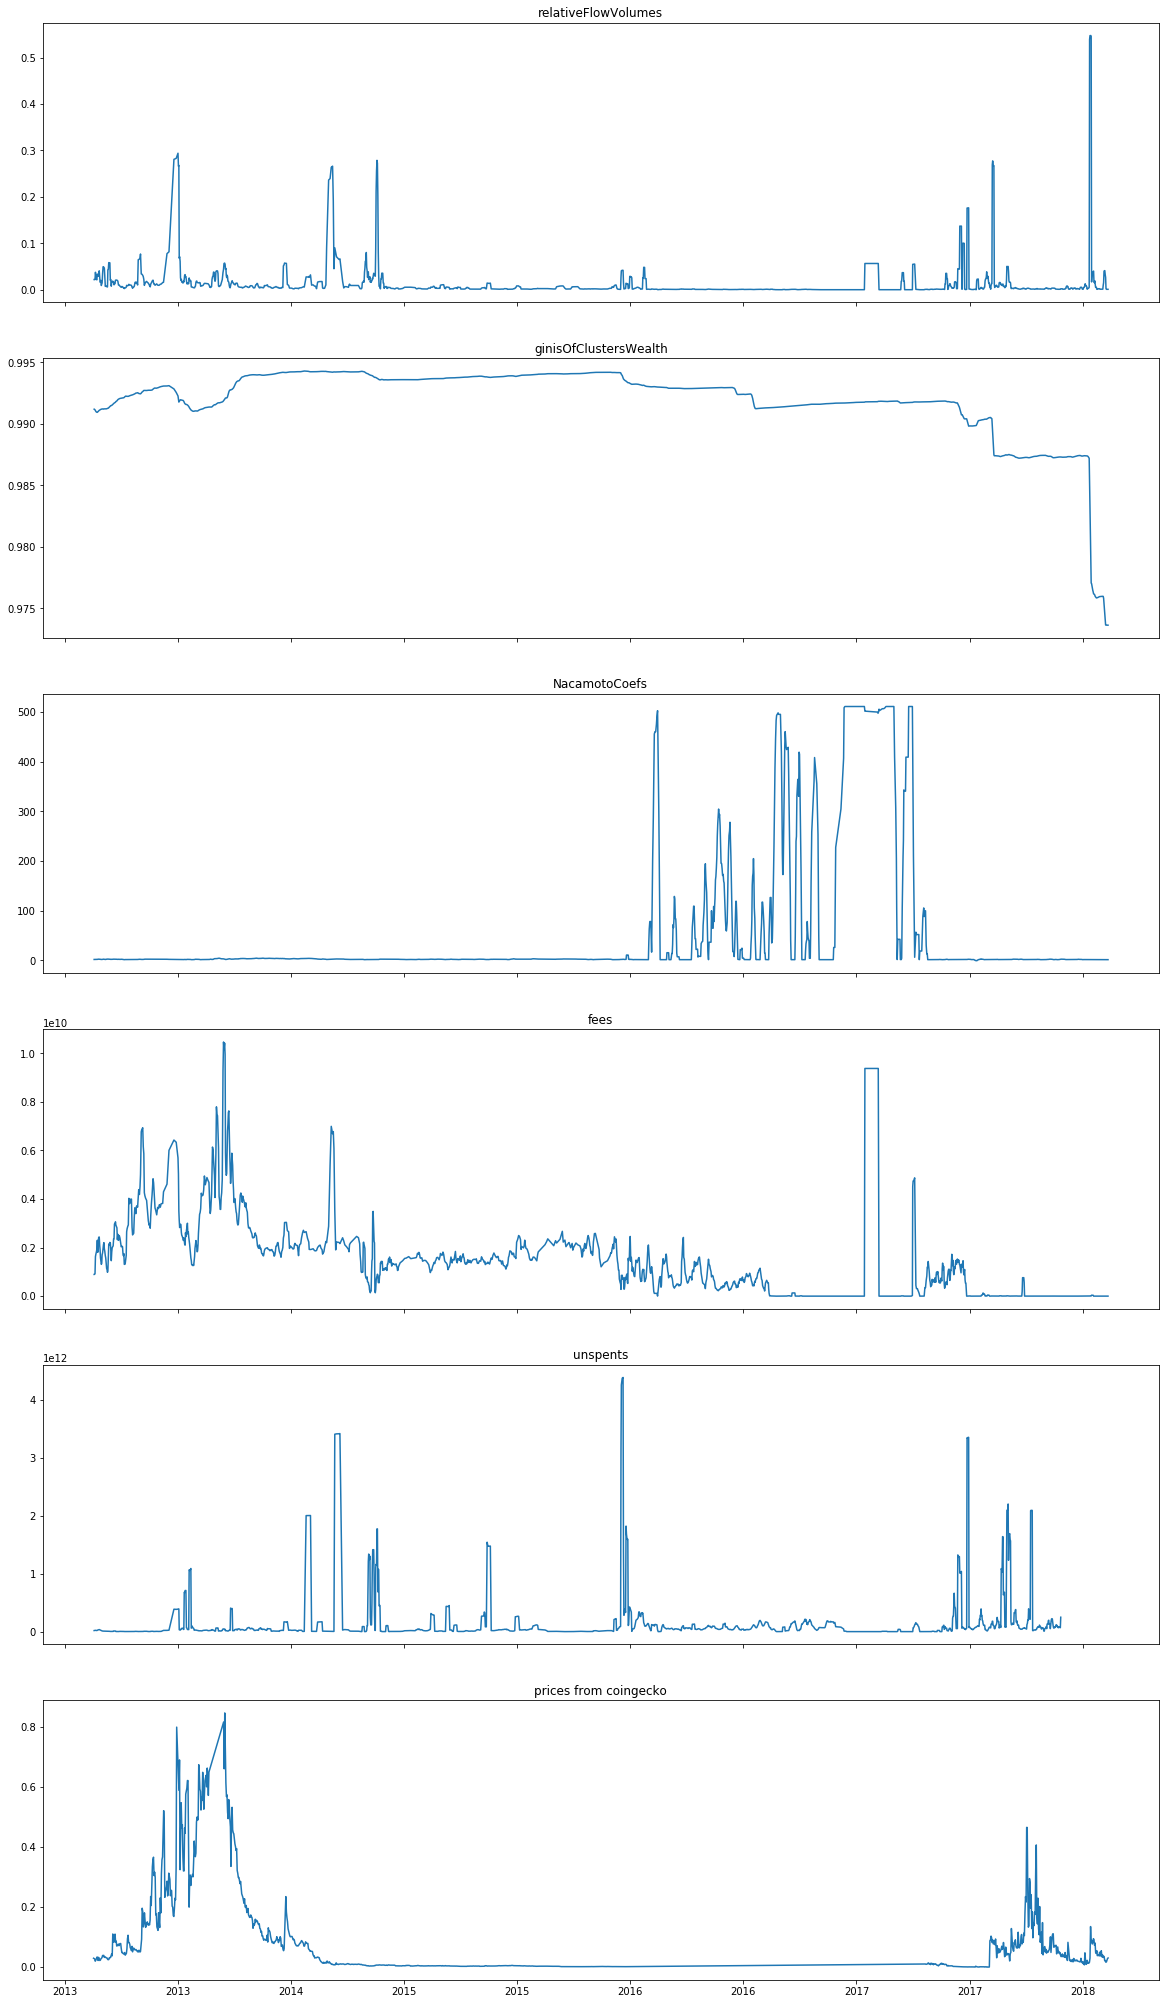

In [32]:
_m = MNC.drawGraph(allMetrics_tag=tag_filtered_m, begin=110, prices_key='coingecko')

In [4]:
# Q_N
MNC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [10]:
%time balance_flow_txcnt_deltas =\
getClustersBalanceFlowTxCountChangeDictBlocksPar(MNC.chain, len(MNC.blocks), MNC[S_MAP_A2C]['np'])

CPU times: user 17.6 s, sys: 548 ms, total: 18.2 s
Wall time: 29 s


In [11]:
balance_flow_txcnt_deltas_list = list(balance_flow_txcnt_deltas.items())

In [12]:
balance_flow_txcnt_deltas_list[3]

(3, array([0, 0, 0]))

In [13]:
bft_deltas_sorted = sorted(balance_flow_txcnt_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

In [15]:
bft_deltas_sorted[-10:]

[(22185, array([             0, 67553496736302,              4])),
 (9728, array([      30000000, 78379345345726,             91])),
 (22007, array([     100000000, 88429100000000,             17])),
 (21707, array([              0, 118497298147224,               6])),
 (22196, array([              0, 139953419013582,              10])),
 (22008, array([              0, 175871000000000,              38])),
 (2341, array([       22033260, 178797597773576,            1812])),
 (4228, array([ 95648401582384, 618558279882450,          806098])),
 (3986, array([       90000000, 636734850000000,              39])),
 (3500, array([     5497981909, 896490534954993,           40435]))]

In [ ]:
sort()

In [33]:
MNC.getNonEmptyClustersCounts()

Work time 42.14s


In [34]:
MNC[S_NONEMPTY_CLS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_nonEmptyClustersCounts_par" file


In [5]:
MNC[S_NONEMPTY_CLS].read('par')

In [6]:
MNC[S_NONEMPTY_ADDS].read('par')

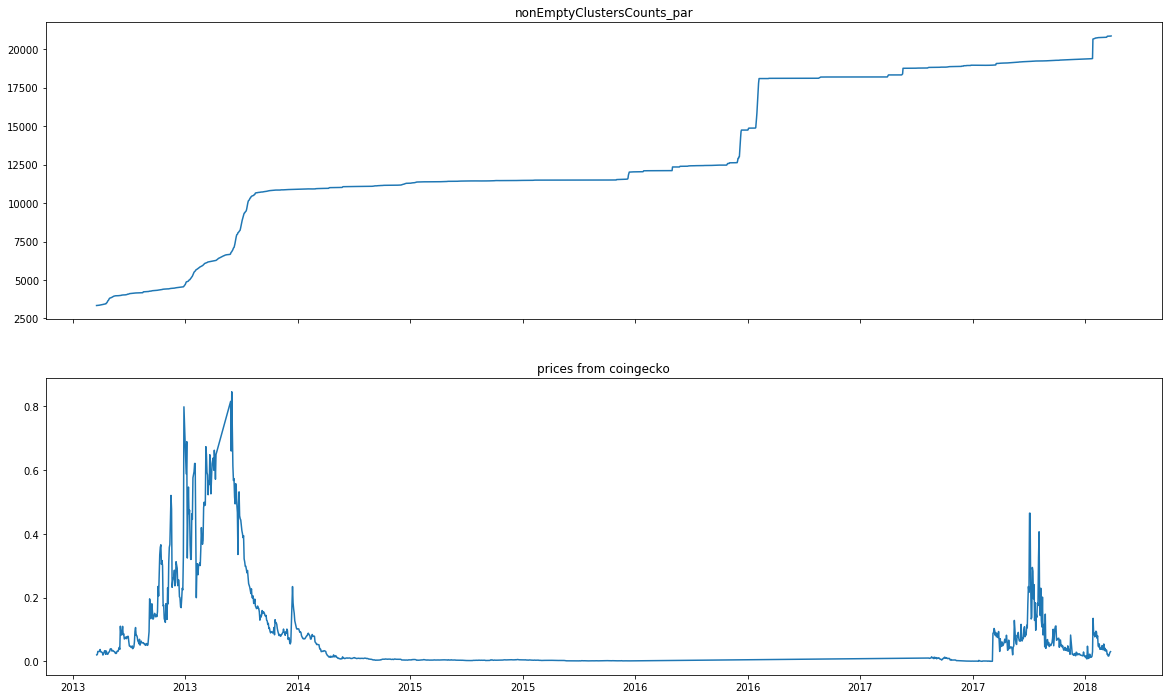

In [10]:
_ = MNC.drawGraph({S_NONEMPTY_CLS: 'par', S_NONEMPTY_ADDS:'par', S_GINIS: 'usingNpMap'},
                  prices_key='coingecko', begin=100)

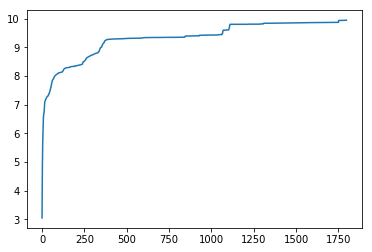

In [36]:
plt.plot(np.log(np.array(MNC[S_NONEMPTY_CLS]['par'])))

In [37]:
MNC.getNonEmptyAddressesCounts()

100 groups are done
200 groups are done
300 groups are done
400 groups are done
500 groups are done
600 groups are done
700 groups are done
800 groups are done
900 groups are done
1000 groups are done
1100 groups are done
1200 groups are done
1300 groups are done
1400 groups are done
1500 groups are done
1600 groups are done
1700 groups are done
Work time 109.8s


In [38]:
MNC[S_NONEMPTY_ADDS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_nonEmptyAddressesCounts_par" file


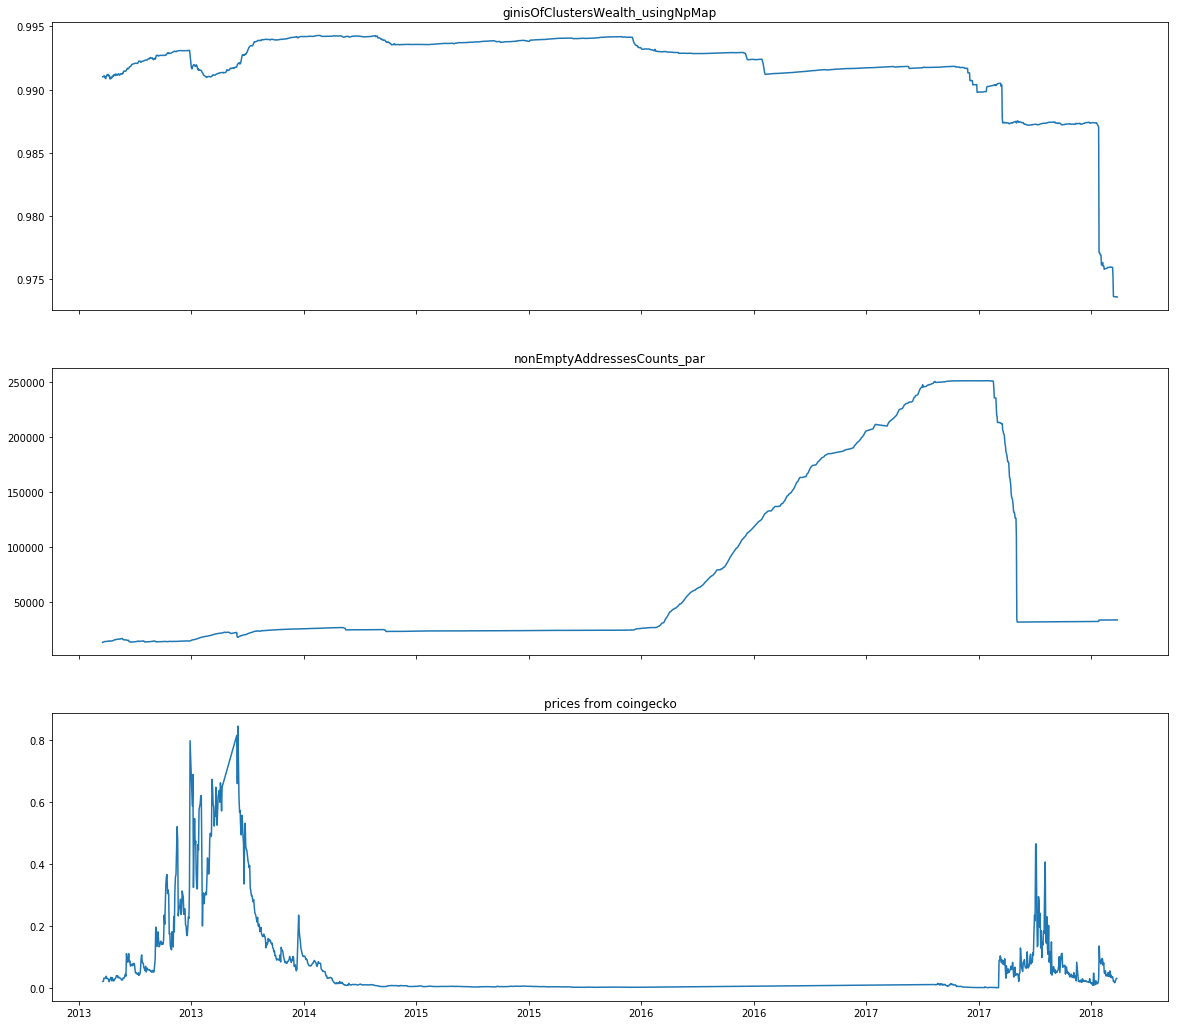

In [44]:
_ = MNC.drawGraph({S_NONEMPTY_ADDS: 'par', S_GINIS:'usingNpMap'}, prices_key='coingecko', begin=100)

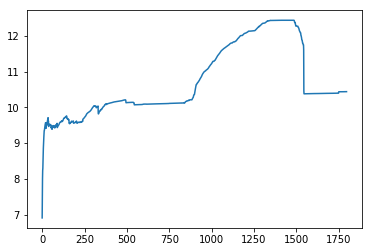

In [40]:
plt.plot(np.log(np.array(MNC[S_NONEMPTY_ADDS]['par'])))

In [54]:
MNC.getNonEmptyAddressesCounts('par_woNulldata')

Exception ignored in: <finalize object at 0x7f3652ce06f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.py", line 463, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmprhmex29z'
Exception ignored in: <finalize object at 0x7f3652ce06f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.p

100 groups are done
200 groups are done
300 groups are done
400 groups are done
500 groups are done
600 groups are done
700 groups are done
800 groups are done
900 groups are done
1000 groups are done
1100 groups are done
1200 groups are done
1300 groups are done
1400 groups are done
1500 groups are done
1600 groups are done
1700 groups are done
Work time 113.06s


In [55]:
MNC[S_NONEMPTY_ADDS].save('par_woNulldata')

Saving "par_woNulldata" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_nonEmptyAddressesCounts_par_woNulldata" file


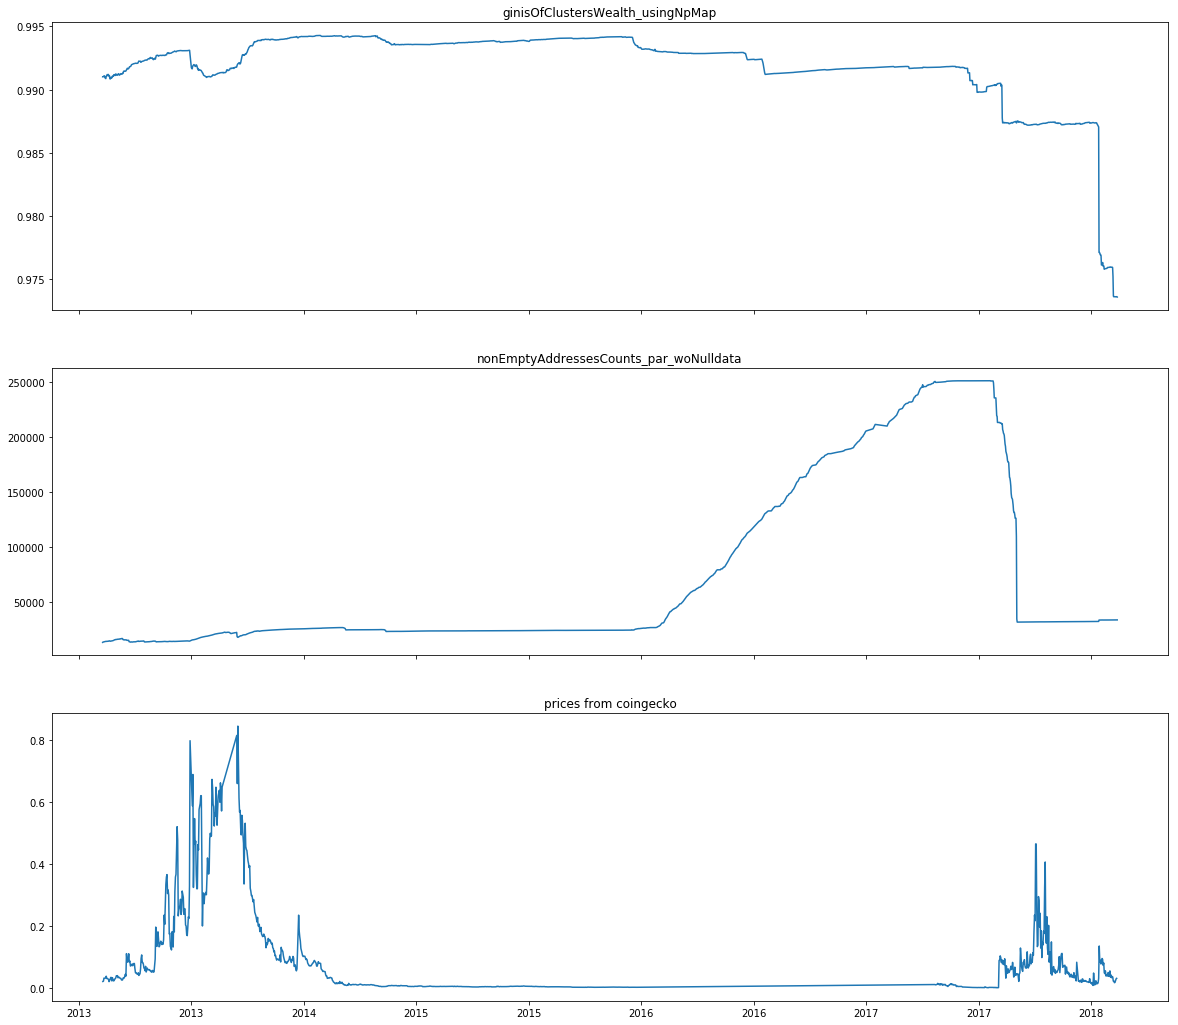

In [59]:
_ = MNC.drawGraph({S_NONEMPTY_ADDS: 'par_woNulldata', S_GINIS:'usingNpMap'}, prices_key='coingecko', begin=100)

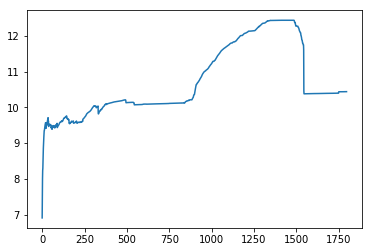

In [60]:
plt.plot(np.log(np.array(MNC[S_NONEMPTY_ADDS]['par_woNulldata'])))

In [41]:
%time balance_flow_txcnt_deltas =\
getClustersBalanceFlowTxCountChangeDictBlocksPar(MNC.chain, len(MNC.blocks), MNC[S_MAP_A2C]['np'])

CPU times: user 42 s, sys: 1.17 s, total: 43.1 s
Wall time: 1min 13s


In [245]:
begin, end = 999999, 1000000

In [246]:
cluster_balances_1 = np.zeros(len(MNC.cl_mgr.clusters()))
cluster_balances_2 = np.zeros(len(MNC.cl_mgr.clusters()))
cluster_balances_3 = np.zeros(len(MNC.cl_mgr.clusters()))

In [247]:
%time cluster_balances_1, _ = getClustersBalanceChangeBlocksNp2(MNC.blocks[begin:end], MNC[S_MAP_A2C]['np'], cluster_balances_1)

Et ya2!
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 229 µs


In [248]:
np.nonzero(cluster_balances_1)

(array([], dtype=int64),)

In [243]:
%time cluster_balances_3 = getClustersBalanceChangeBlocksNonPar(MNC.chain, begin, end, MNC[S_MAP_A2C]['np'], cluster_balances_3)

CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.2 s


In [236]:
np.nonzero(cluster_balances_1)

(array([], dtype=int64),)

In [244]:
(cluster_balances_1 == cluster_balances_3).all()

True

In [237]:
MNC.chain[100000].output_value

200000000

In [228]:
cluster_balances_1[cluster_balances_1 != cluster_balances_3]

array([ 0.])

In [220]:
cluster_balances_3[cluster_balances_1 != cluster_balances_3]

array([  2.00000000e+08])

In [207]:
(cluster_balances_2 == cluster_balances_3).all()

True

In [206]:
%time cluster_balances_2 = getClustersBalanceChangeBlocksPar(MNC.chain, begin, end, MNC[S_MAP_A2C]['np'], cluster_balances_2)

CPU times: user 264 ms, sys: 272 ms, total: 536 ms
Wall time: 738 ms


In [ ]:
len(cluster_balances_1[cluster_balances_1 != cluster_balances_2])

In [ ]:
getClustersBalanceChangeByGroupsPar()

In [ ]:
# Q_CALCULATION

In [4]:
MNC.getMapAddress2Cluster()

Work time 12.01s


In [5]:
MNC[S_MAP_A2C].save('np', check=False)

Saving "np" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_map_address2cluster_np" file


In [6]:
MNC.getGinis()

90516
Work time 76.32s


In [7]:
MNC[S_GINIS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_ginisOfClustersWealth_usingNpMap" file


In [8]:
MNC.guessMiners()

Work time 24.83s


In [9]:
MNC.getNCs()

Work time 2.5s


In [10]:
MNC[S_NCS].save('')

Saving "" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_NacamotoCoefs" file


In [11]:
MNC.getFees()

Work time 1.95s


In [12]:
MNC[S_FEES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_fees_par" file


In [13]:
MNC.getUnspents()

Work time 7.83s


In [14]:
MNC[S_UNSPENTS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_unspents_par" file


In [15]:
MNC.getFlowAndIncomeVolume()

Work time 24.17s


In [16]:
len(MNC[S_FLOWS_INCOMES]['par']['flows'])

1798

In [17]:
MNC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_flowAndIncomeVolumes_par" file


In [18]:
MNC.getRelativeFlowVolumes()

Work time 0.0s


In [19]:
MNC[S_REL_FLOWS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_relativeFlowVolumes_par" file


In [20]:
MNC.getActiveAddressesCounts()

Work time 56.2s


In [21]:
MNC[S_ADDS_CNTS].save('')

Saving "" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_activeAddressesCounts" file


In [22]:
MNC.getActiveClustersCounts()

Work time 60.44s


In [23]:
MNC[S_CLS_CNTS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_activeClustersCounts_usingNpMap" file


In [24]:
prices_m_df = pd.read_csv('~/thesis_work/downloaded/mnc-usd-max.csv')
prices_m_df[:3]

,snapped_at,price,market_cap,total_volume
0,2013-05-03 00:00:00 UTC,0.099005,100528.0,0.0
1,2013-05-04 00:00:00 UTC,0.193906,197809.0,0.0
2,2013-05-05 00:00:00 UTC,0.118000,120599.0,0.0


In [25]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_m_df['snapped_at']),
                            'prices': prices_m_df['price']}

In [26]:
prices_b_df_to_save = pd.DataFrame(prices_b_df_to_save_dict)

In [27]:
MNC.prices.add('coingecko', prices_b_df_to_save)

In [28]:
MNC.prices.save('coingecko', check=False)

Saving "coingecko" version in "/home/ubuntu/thesis_work/calculated/mincoin_full/int1000b_prices_coingecko" file


In [21]:
del MNC.prices.v['coingecko']

In [22]:
MNC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


In [ ]:
%time balance_flow_txcnt_deltas =\
getClustersBalanceFlowTxCountChangeDictBlocksPar(LTC.chain, len(LTC.blocks), LTC[S_MAP_A2C]['np'])

In [6]:
# Q_EXCHANGE_ADDS
start_time = time.time()
grouped_balance_flow_txcnt_deltas = []
group_size = 100000
groups_count = (len(MNC.blocks) - 1) // group_size + 1
for i in range(groups_count):
    balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(MNC.chain,
                                                                                  start=group_size*i,
                                                                                  end=group_size*(i+1))
    grouped_balance_flow_txcnt_deltas.append(balance_flow_txcnt_deltas)
    print('{}%'.format(100 * i / groups_count))
print(time.time() - start_time)

0.0%
12.5%
25.0%
37.5%
50.0%
62.5%
75.0%
87.5%
37.97672963142395


In [7]:
%time adds_balance_flow_txcnt_deltas = sumClusterDicts(grouped_balance_flow_txcnt_deltas)

CPU times: user 676 ms, sys: 8 ms, total: 684 ms
Wall time: 681 ms


In [8]:
adds_BFT_deltas_list = list(adds_balance_flow_txcnt_deltas.items())

In [9]:
%time BFT_deltas_sorted_120 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

CPU times: user 620 ms, sys: 16 ms, total: 636 ms
Wall time: 636 ms


In [11]:
%time BFT_deltas_sorted_210 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))

CPU times: user 784 ms, sys: 16 ms, total: 800 ms
Wall time: 799 ms


In [13]:
BFT_deltas_sorted_210[-10:]

[(1764282, array([  19928000763, 7705344002089,         39156])),
 (1293632, array([  50221422847, 9806640268841,         44432])),
 (1682252, array([ 387693417095, 8299480250757,         44946])),
 (415282, array([   79382014012, 12014146040404,          61567])),
 (1586742, array([   66874964116, 12683824891274,          65577])),
 (2497711, array([   39940010221, 19207820029951,          97398])),
 (416192, array([   55332493979, 23122397480405,         117354])),
 (1031342, array([  303449461228, 24972748378032,         133872])),
 (2542472, array([  813751052635, 27561493154759,         140683])),
 (2467022, array([  125501000160, 35084503002032,         174741]))]

In [22]:
MNC.getNonEmptyAddressesCounts('par')

Work time 47.6s


In [24]:
MNC[S_NONEMPTY_CLS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_nonEmptyClustersCounts'...
  Got 'int1000b_nonEmptyClustersCounts_par.json', key is 'par'
Finish


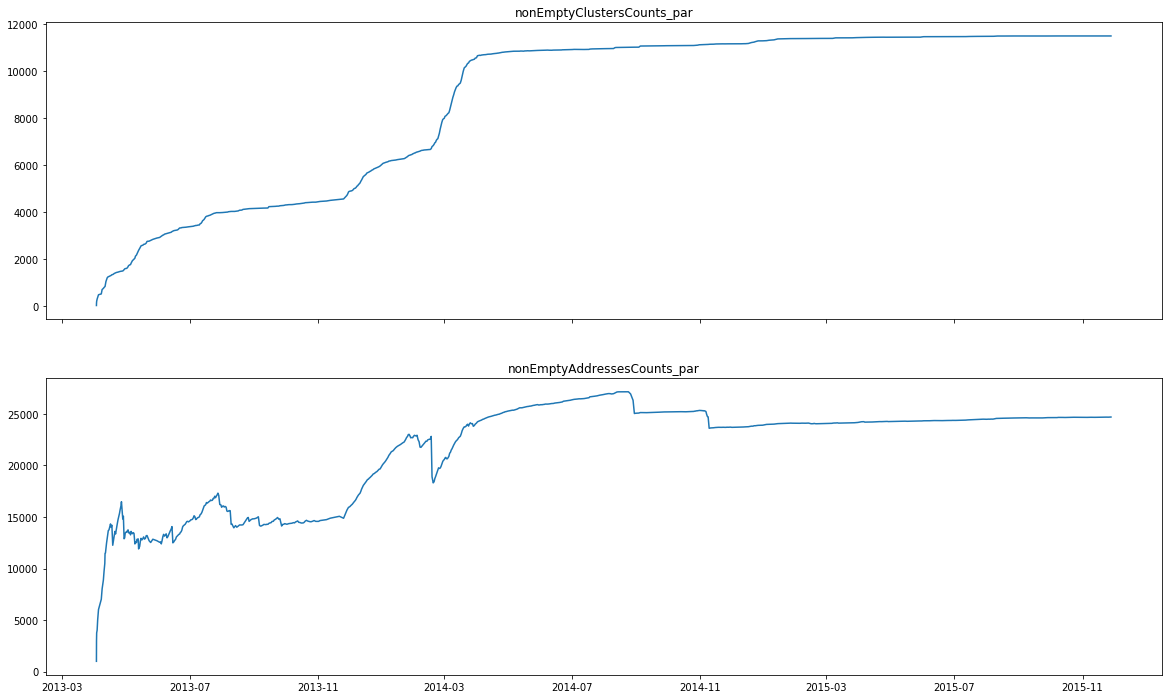

In [25]:
_ = MNC.drawGraph({S_NONEMPTY_ADDS: 'par', S_NONEMPTY_CLS: 'par'})

In [26]:
MNC[S_NONEMPTY_ADDS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_nonEmptyAddressesCounts_par" file


In [8]:
map_addtype2num[3]

address_type.multisig_pubkey

In [11]:
map_addtype2num[blocksci.address_type.multisig_pubkey]

address_type.multisig_pubkey

In [10]:
map_addtype2num = {}
addtype_num = 0
for add_type in blocksci.address_type.types:
    map_addtype2num[add_type] = addtype_num
    map_addtype2num[addtype_num] = add_type
    addtype_num += 1

In [45]:
map_addtype2num[]

dict_keys([address_type.nonstandard, address_type.pubkey, address_type.pubkeyhash, address_type.multisig_pubkey, address_type.scripthash, address_type.multisig, address_type.nulldata, address_type.witness_pubkeyhash, address_type.witness_scripthash])

In [13]:
map_addtype2num[1] = 'huy'

In [46]:
hash(blocksci.address_type.nulldata)

6

In [17]:
hash(3)

3

In [19]:
hash(blocksci.address_type.witness_scripthash)

8

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


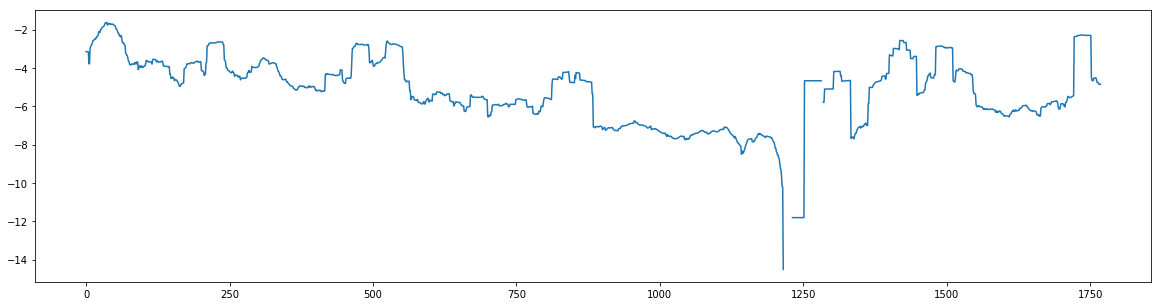

In [5]:
meaned_relflows = runningMean(MNC[S_REL_FLOWS]['par'], 30)
plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.set_ylim(top=0.03)
ax.plot(np.log(meaned_relflows))

In [25]:
len(MNC.times)

1798

In [30]:
tag_m = MNC.gatherAllMetrics({S_REL_FLOWS:'par'})
tag_filtered_m = MNC.rollingMeanAllMetrics(allMetrics_tag=tag_m, common_win=55)

Gathered under tag 'relativeFlowVolumes=par'
There is already relativeFlowVolumes=par version of data, stop


/home/ubuntu/thesis_work/my_tools.py:928: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=55).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


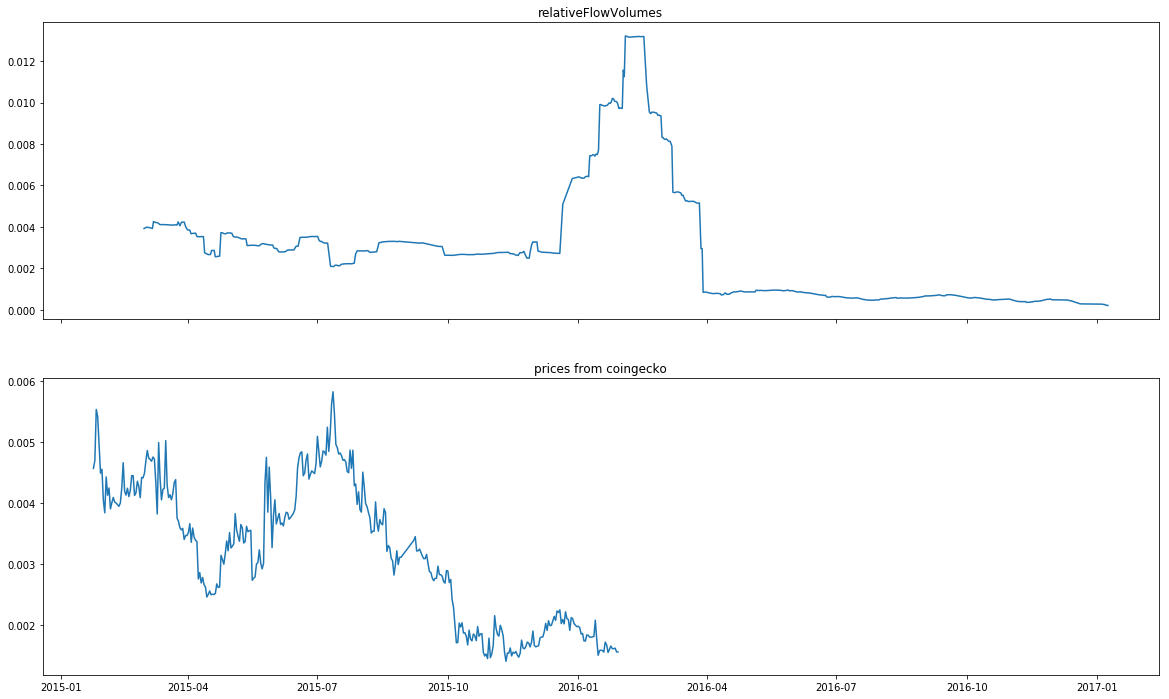

In [31]:
_m = MNC.drawGraph(allMetrics_tag=tag_filtered_m, begin=600, end=1200, prices_key='coingecko', prices_log=False)